In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [139]:

prices_path_1 = r'D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-1.csv'
prices_path_2 = r'D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-2.csv'
prices_path_0 = r'D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_0.csv'
df_0 = pd.read_csv(prices_path_0, sep=";")
df_1 = pd.read_csv(prices_path_1, sep=";")
df_2 = pd.read_csv(prices_path_2, sep=";")

merged = pd.concat([df_2,df_1,df_0], axis=0)
merged = merged.fillna(0) 
merged['mid_price'] = (merged['bid_price_1']+merged['ask_price_1'])/2
merged['spread'] = (merged['ask_price_1']-merged['bid_price_1'])
merged['total_bid_voltume'] = merged['bid_volume_1'] + merged['bid_volume_2'] + merged['bid_volume_3']
merged['total_ask_volume'] = merged['ask_volume_1'] + merged['ask_volume_2'] + merged['ask_volume_3']
merged['imbalance'] = merged['total_bid_voltume']-merged['total_ask_volume'] 
merged['max_ask'] = merged[['ask_price_1', 'ask_price_2', 'ask_price_3']].max(axis=1)
merged['min_bid'] = merged[['bid_price_1', 'bid_price_2', 'bid_price_3']].min(axis=1)

df_am = merged.loc[merged["product"] == "AMETHYSTS"]
df_am.index = np.arange(1,30001)
df_star = merged.loc[merged["product"] == "STARFRUIT"]
df_star.index = np.arange(1,30001)

In [163]:
int(round(-1.6))

-2

In [152]:
df_am.keys()

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'spread',
       'total_bid_voltume', 'total_ask_volume', 'imbalance'],
      dtype='object')

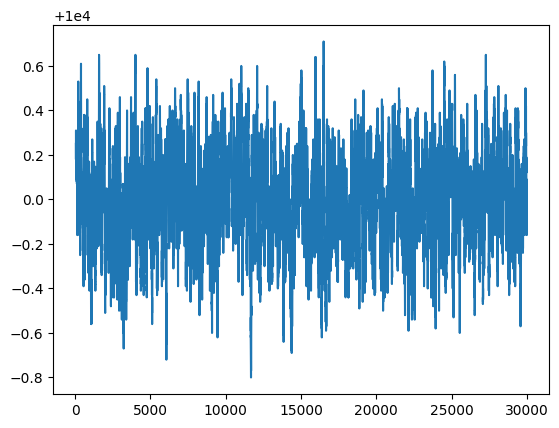

In [141]:
plt.plot(df_am['mid_price'].rolling(50).mean())

# STARFRUIT

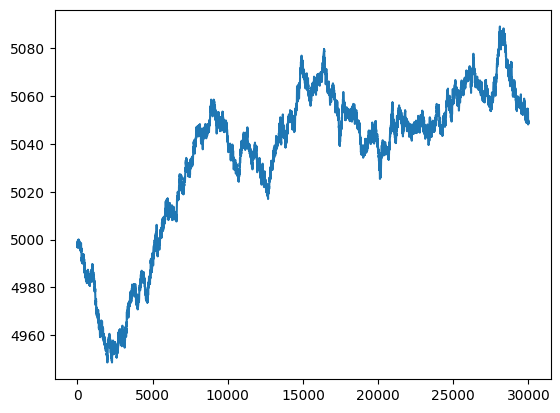

In [156]:
plt.plot(df_star['bid_price_1'].rolling(5).mean())

In [153]:
X = []
Y = []
trend = np.array(df_star['bid_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [154]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.729e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:47:43   Log-Likelihood:                -40433.
No. Observations:               20000   AIC:                         8.088e+04
Df Residuals:                   19995   BIC:                         8.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2342      1.909      1.694      0.0

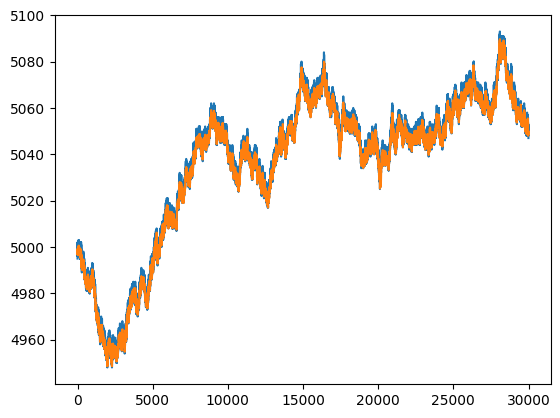

In [155]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)

In [157]:
X = []
Y = []
trend = np.array(df_star['ask_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [158]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:49:44   Log-Likelihood:                -39434.
No. Observations:               20000   AIC:                         7.888e+04
Df Residuals:                   19995   BIC:                         7.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9417      1.815      1.621      0.1

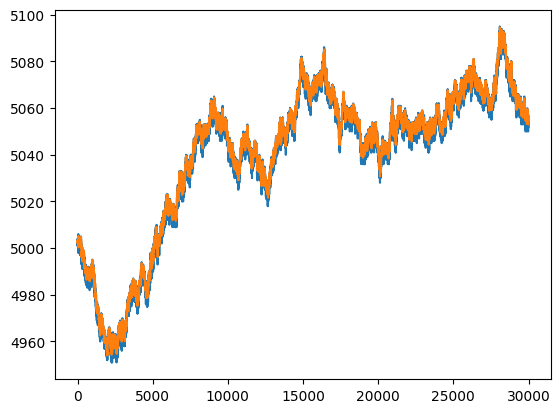

In [159]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)